In [1]:
import numpy as np
import matplotlib.pyplot as plt
import classes as cl
import masslosstime_env as ml_env

In [2]:
starparams=(1.14,4790, 1.73, 5860.88) #mass, age, radius, effective temperature 
planetRockyparams=(1.56,9.341) #radius, period
planetEnvparams=(2.43,13.727)  #radius, period
system=cl.PlanetarySystem(starparams, planetRockyparams, planetEnvparams, N=1000, Mstar_err=.05, Star_age_err=700, Rstar_err=.1, Teff_err=138.56, Rrocky_err=0.07, Procky_err=0.0, Renv_err=0.11, Penv_err=0.0)

  0%|                                             | 0/1000 [00:00<?, ?it/s]C:\Users\madir\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
  0%|                                     | 1/1000 [00:00<07:38,  2.18it/s]C:\Users\madir\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
 17%|█████▉                             | 169/1000 [01:36<07:41,  1.80it/s]C:\Users\madir\Radius_Valleyproj\planetstructure.py:105: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the be

In [ ]:
#if the above cell contains sampled radius values that return an error
#run this cell to remove the min mass values associated with the faulty radius values
#then we are only plotting the min mass estimates that did not trigger value errors within the script

for i in range (np.size(ml_env.errs)): 
    j=np.where(system.planetEnv.Rcore_samp==ml_env.errs[i])
    system.planetEnv.Rcore_samp=np.delete(system.planetEnv.Rcore_samp,j)
    
print(np.size(system.planetEnv.Rcore_samp))


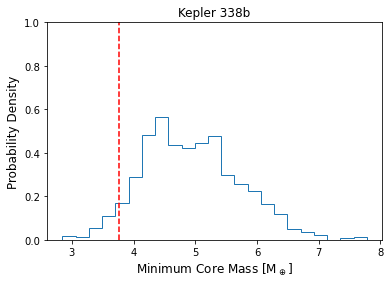

The 95% upper limit to be consistent with photoevaporation is
3.770830673720425 Mearth


In [3]:
q25, q75 = np.percentile(system.planetEnv.minMcore_samps, [25, 75])
bin_width = 2 * (q75 - q25) * len(system.planetEnv.minMcore_samps) ** (-1/3)
bins = round((system.planetEnv.minMcore_samps.max() - system.planetEnv.minMcore_samps.min()) / bin_width)
plt.hist(system.planetEnv.minMcore_samps,bins=bins,density=True,histtype='step')
plt.plot([(np.percentile(system.planetEnv.minMcore_samps,5.)),(np.percentile(system.planetEnv.minMcore_samps,5.))],[0.,1.],'--',color='r')
#plt.plot([60.2,60.2],[0,1.],':',color='b')
#plt.axvspan(49, 71, color='b', alpha=0.2)
plt.ylim((0.,1.))
plt.ylabel('Probability Density',fontsize=12)
plt.xlabel(r'Minimum Core Mass [M$_\oplus$]',fontsize=12)
plt.title('Kepler 338b')
#plt.savefig('Kepler338b_1000.png',dpi=180., bbox_inches='tight')
plt.show()
print('The 95% upper limit to be consistent with photoevaporation is')
print((np.percentile(system.planetEnv.minMcore_samps,5.)),'Mearth')